## Customer Churn Prediction for a Subscription-Based Business


## Task:
To clasify whether a customer will renew their subscription or cancel it based on their usage pattern, demographics and feedback data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [31]:
### Reading the csv file using pandas
df = pd.read_csv('customer_churn_dataset.csv')

In [ ]:
# Removing unnecesssary columns
df.drop(columns= 'Customer_ID', axis=1, inplace=True)


In [35]:
df.head()


,Age,Gender,Region,Subscription_Type,Avg_Weekly_Hours,Total_Videos_Watched,Premium_Content_Percentage,Customer_Rating,Support_Tickets_Raised,Tenure_Months,Payment_Method,Discount_Availed,Churn
0,56,Male,North,Premium,8.8,216,76.7,3.6,7,50,Credit Card,0,0
1,69,Male,South,Standard,18.2,57,70.2,1.2,2,25,Debit Card,0,0
2,46,Male,West,Basic,14.6,145,33.1,2.5,6,35,Credit Card,0,0
3,32,Female,North,Basic,12.6,210,67.6,4.9,6,52,Credit Card,0,0
4,60,Male,West,Basic,6.9,259,39.6,2.7,6,32,PayPal,0,1


In [36]:

### Checking for null values. I love when I find them because it is fun to deal with them.
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   object 
 2   Region                      1000 non-null   object 
 3   Subscription_Type           1000 non-null   object 
 4   Avg_Weekly_Hours            1000 non-null   float64
 5   Total_Videos_Watched        1000 non-null   int64  
 6   Premium_Content_Percentage  1000 non-null   float64
 7   Customer_Rating             1000 non-null   float64
 8   Support_Tickets_Raised      1000 non-null   int64  
 9   Tenure_Months               1000 non-null   int64  
 10  Payment_Method              1000 non-null   object 
 11  Discount_Availed            1000 non-null   int64  
 12  Churn                       1000 non-null   int64  
dtypes: float64(3), int64(6), object(4)

In [37]:

### Training the data first to prevent data leakage

from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [38]:
### Label Encoding is perfect for binary data such as Genders
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
X_train['Gender']=lencoder.fit_transform(X_train['Gender'])
X_test['Gender']=lencoder.transform(X_test['Gender'])



In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 475 to 721
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Gender                      800 non-null    int64  
 2   Region                      800 non-null    object 
 3   Subscription_Type           800 non-null    object 
 4   Avg_Weekly_Hours            800 non-null    float64
 5   Total_Videos_Watched        800 non-null    int64  
 6   Premium_Content_Percentage  800 non-null    float64
 7   Customer_Rating             800 non-null    float64
 8   Support_Tickets_Raised      800 non-null    int64  
 9   Tenure_Months               800 non-null    int64  
 10  Payment_Method              800 non-null    object 
 11  Discount_Availed            800 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 81.2+ KB


In [12]:
X_train.columns


Index(['Age', 'Gender', 'Region', 'Subscription_Type', 'Avg_Weekly_Hours',
       'Total_Videos_Watched', 'Premium_Content_Percentage', 'Customer_Rating',
       'Support_Tickets_Raised', 'Tenure_Months', 'Payment_Method',
       'Discount_Availed'],
      dtype='object')

In [13]:
# Here I used a longer version of the code. I could have used columntransformer as part of more efficient code

# OneHotEncoding helps deal with categorical data and it is a crucial step for training ML models because ML models hates
# any features that is not encoded in numbers

# StandardScaler helps in normalize the numerical values which helps ML models make better predictions

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

categorical_features = ['Region', 'Subscription_Type', 'Payment_Method']
numerical_features = ['Age', 'Avg_Weekly_Hours',
       'Total_Videos_Watched', 'Premium_Content_Percentage', 'Customer_Rating',
       'Support_Tickets_Raised', 'Tenure_Months', 'Discount_Availed']

encoded_train = encoder.fit_transform(X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

scaled_train = scaler.fit_transform(X_train[numerical_features])
scaled_test = scaler.transform(X_test[numerical_features])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))
scaled_train_df = pd.DataFrame(scaled_train, columns= numerical_features)

encoded_test_df = pd.DataFrame(encoded_test, columns= encoder.get_feature_names_out(categorical_features))
scaled_test_df = pd.DataFrame(scaled_test, columns= numerical_features)

X_train_final = pd.concat([encoded_train_df, scaled_train_df], axis=1)
X_test_final = pd.concat([encoded_test_df, scaled_test_df], axis=1)

print("X_train_final:")
print(X_train_final)

print("\nX_test_final:")
print(X_test_final)

X_train_final:
     Region_East  Region_North  Region_South  Region_West  \
0            0.0           0.0           0.0          1.0   
1            0.0           1.0           0.0          0.0   
2            0.0           0.0           1.0          0.0   
3            0.0           1.0           0.0          0.0   
4            0.0           0.0           0.0          1.0   
..           ...           ...           ...          ...   
795          1.0           0.0           0.0          0.0   
796          0.0           0.0           0.0          1.0   
797          0.0           1.0           0.0          0.0   
798          0.0           0.0           1.0          0.0   
799          0.0           0.0           1.0          0.0   

     Subscription_Type_Basic  Subscription_Type_Premium  \
0                        0.0                        0.0   
1                        0.0                        1.0   
2                        0.0                        1.0   
3               

In [14]:
### Checking for imbalanced dataset because the classification report is not good
print(X_train_final.value_counts()[0])
print(X_train_final.value_counts()[1])
# The dataset is heavily imbalanced leaning towards majority class (non-churn)

Region_North  Region_South  Region_West  Subscription_Type_Basic  Subscription_Type_Premium  Subscription_Type_Standard  Payment_Method_Credit Card  Payment_Method_Debit Card  Payment_Method_PayPal  Age        Avg_Weekly_Hours  Total_Videos_Watched  Premium_Content_Percentage  Customer_Rating  Support_Tickets_Raised  Tenure_Months  Discount_Availed
0.0           0.0           1.0          0.0                      0.0                        1.0                         0.0                         1.0                        0.0                     0.133878  -1.517445          0.744238             -0.927353                    0.614809         1.493457                0.848673       1.509533           1
                                                                                                                                                                                                        0.066305   0.789454          0.422798              1.537630                   -1.364283      

In [15]:
### Dealing with imbalanced dataset
# SMOTE: Creating more samples for the minority class to avoid imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_resampled.value_counts()}")


Original dataset shape: Churn
0    587
1    213
Name: count, dtype: int64
Resampled dataset shape: Churn
0    587
1    587
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Before Interactive Feature Engineering')

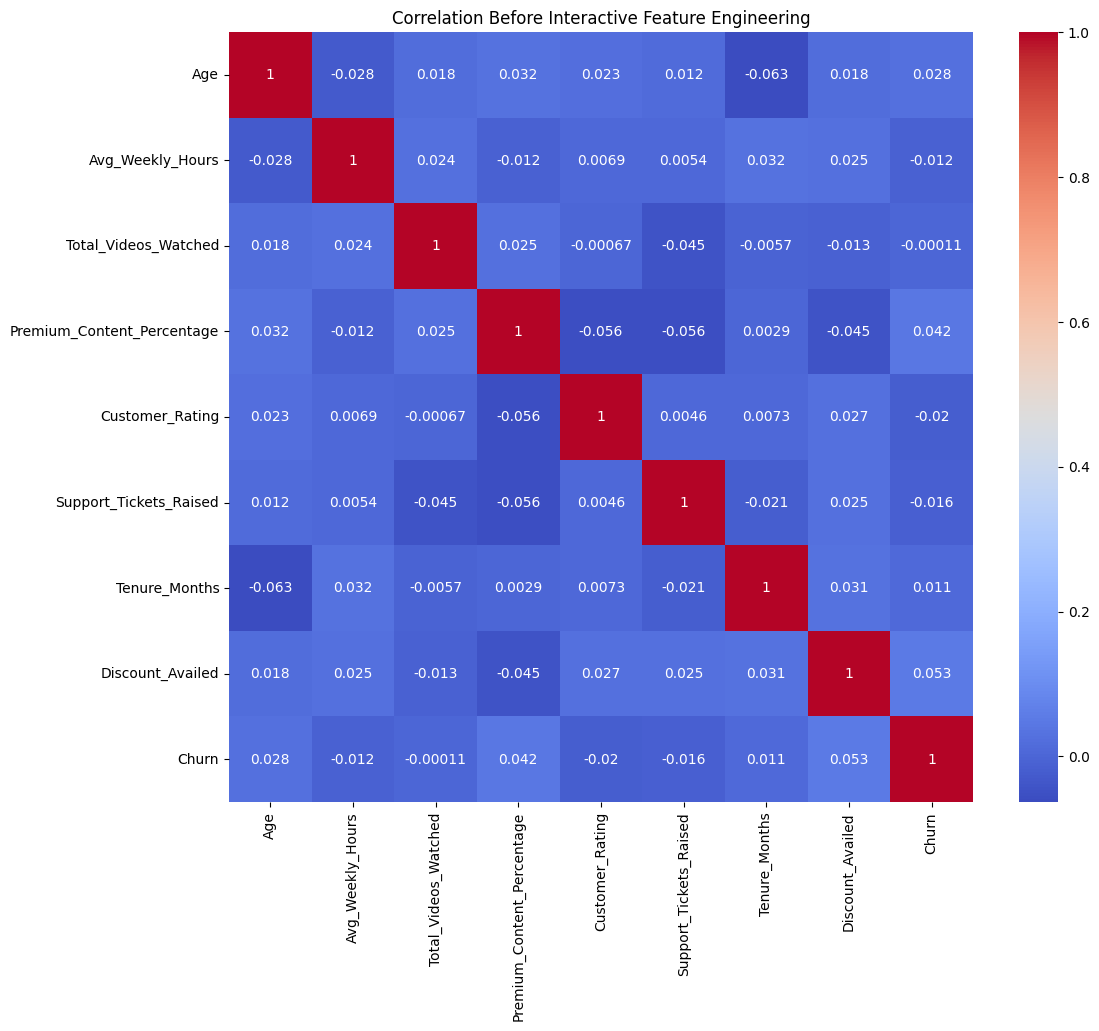

In [16]:
### Not a good correlation between features. This means we need to use interactive feature engineering otherwise
### the results of the ML models will be bad

combined_features = numerical_features + ['Churn']
matrix = df[combined_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Before Interactive Feature Engineering')


In [17]:
# Example of interaction and ratio features
X_train_final['Discount_Tenure'] = X_train_final['Discount_Availed'] * X_train_final['Tenure_Months']
X_test_final['Discount_Tenure'] = X_test_final['Discount_Availed'] * X_test_final['Tenure_Months']

X_train_final['Engagement_Per_Week'] = X_train_final['Total_Videos_Watched'] / X_train_final['Avg_Weekly_Hours']
X_test_final['Engagement_Per_Week'] = X_test_final['Total_Videos_Watched'] / X_test_final['Avg_Weekly_Hours']

X_train_final['Age_Engagement'] = X_train_final['Age'] * X_train_final['Total_Videos_Watched']
X_test_final['Age_Engagement'] = X_test_final['Age'] * X_test_final['Total_Videos_Watched']

X_train_final['Total_Engagement'] = X_train_final['Avg_Weekly_Hours'] + X_train_final['Total_Videos_Watched'] + X_train_final['Premium_Content_Percentage']
X_test_final['Total_Engagement'] = X_test_final['Avg_Weekly_Hours'] + X_test_final['Total_Videos_Watched'] + X_test_final['Premium_Content_Percentage']

X_train_final['Engagement_Score'] = X_train_final['Customer_Rating'] - X_train_final['Support_Tickets_Raised']
X_test_final['Engagement_Score'] = X_test_final['Customer_Rating'] - X_test_final['Support_Tickets_Raised']

In [18]:
# Droping unnecessary features
features_to_drop = ['Discount_Availed', 'Tenure_Months', 'Avg_Weekly_Hours', 'Premium_Content_Percentage', 'Total_Videos_Watched']
X_train_final = X_train_final.drop(columns=features_to_drop)
X_test_final = X_test_final.drop(columns=features_to_drop)

print("Dropped Original Features:", features_to_drop)

Dropped Original Features: ['Discount_Availed', 'Tenure_Months', 'Avg_Weekly_Hours', 'Premium_Content_Percentage', 'Total_Videos_Watched']


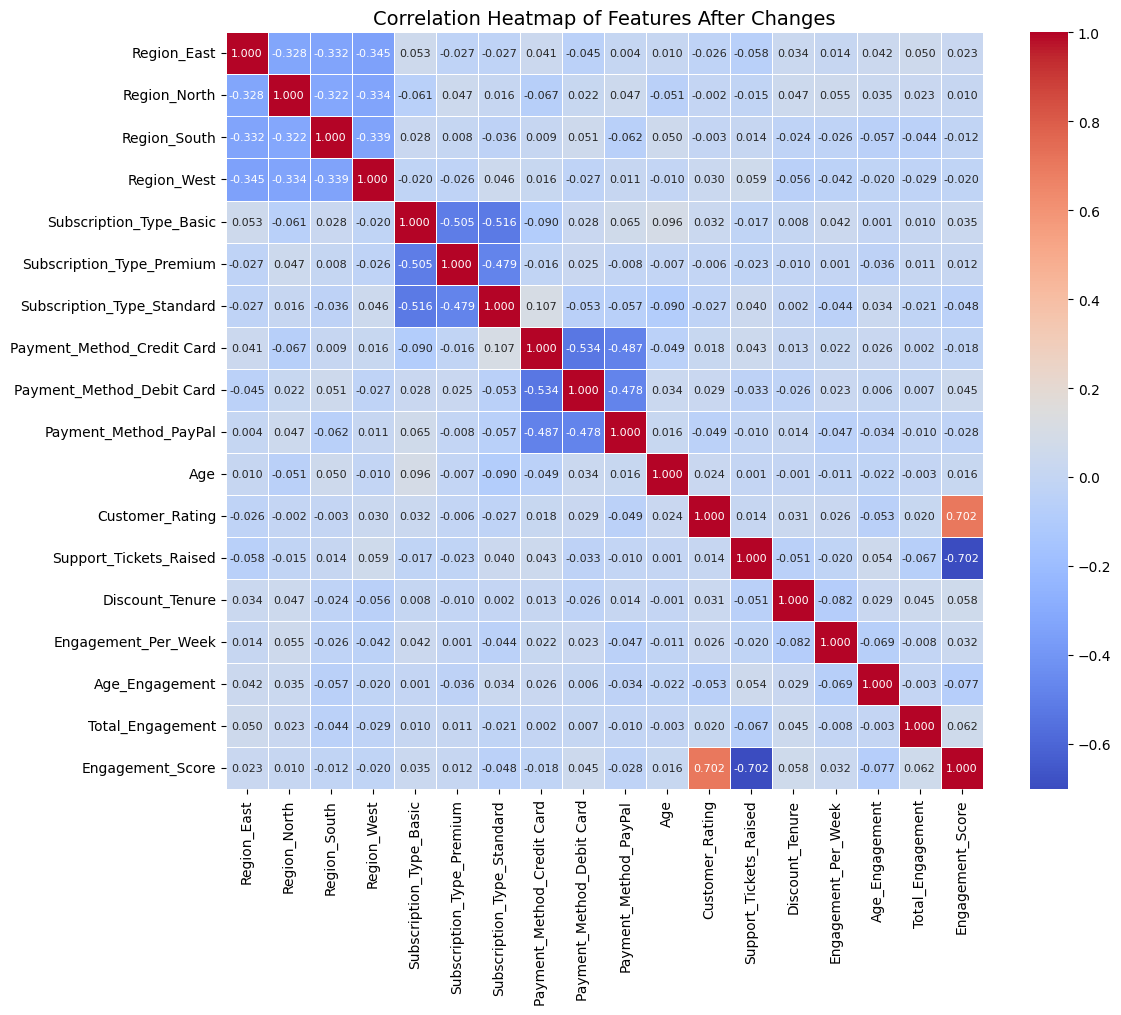

In [19]:
combined_features = numerical_features + ['Churn']
matrix = X_train_final.corr()

plt.figure(figsize=(12, 10))


sns.heatmap(
    matrix, 
    annot=True,  
    fmt=".3f",  
    cmap='coolwarm',  
    cbar=True,  
    square=True,  
    linewidths=0.5,  
    annot_kws={"size": 8}  
)

# Add title
plt.title("Correlation Heatmap of Features After Changes", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

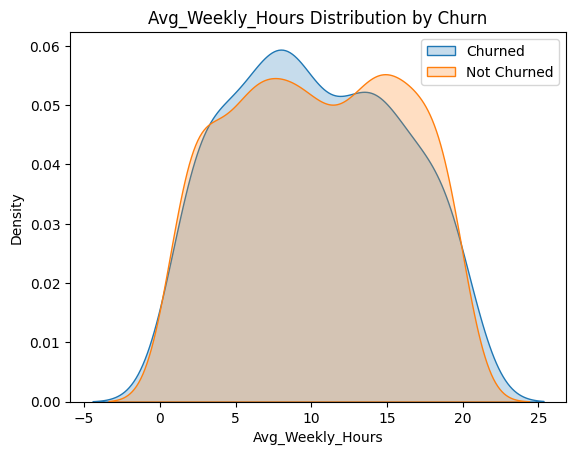

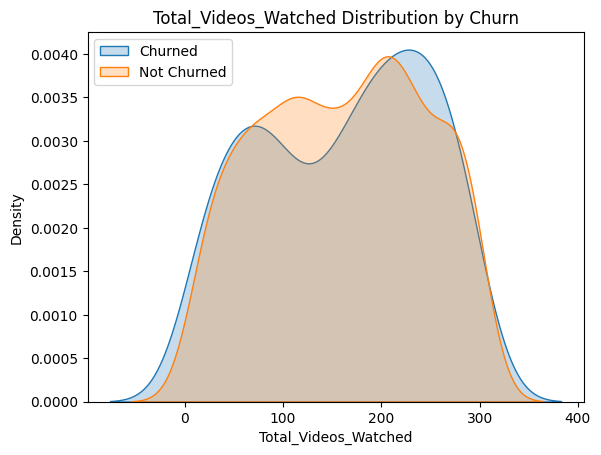

In [20]:
### Efficient way of using for loop to target two features
for col in ["Avg_Weekly_Hours", "Total_Videos_Watched"]:
    sns.kdeplot(df[col][df["Churn"] == 1], label="Churned", fill=True)
    sns.kdeplot(df[col][df["Churn"] == 0], label="Not Churned", fill=True)
    plt.title(f"{col} Distribution by Churn")
    plt.legend()
    plt.show()


In [21]:
### Logistic Regression is good for binary classification problems. 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)
print('Classification Report')
print("----------------------------------")
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print("----------------------------------")
print(confusion_matrix(y_test, y_pred))

Classification Report
----------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       171
           1       0.00      0.00      0.00        29

    accuracy                           0.85       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.73      0.85      0.79       200

Confusion Matrix
----------------------------------
[[171   0]
 [ 29   0]]


In [23]:
# Support Vector Regression helps in predicting continuous nummerical values 
# using hyperplane techniques. 

# RandomizedSearchCV is used for hyperparameter tuning utilizing the given hyperparameter values.
# It is better than GridSearchCV when dealing with large dataset

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C': [0.1, 1, 10],                         
    'gamma': ['scale', 'auto', 0.1, 1, 0.001, 0.0001],                                    
}
svr = SVR()
grid = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, verbose=1, n_jobs=-1)
grid.fit(X_train_final, y_train)
print("Best parameters: ", grid.best_params_)

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

best_model = grid.best_estimator_
y_pred1 = best_model.predict(X_test_final)
print('RMSE: ', root_mean_squared_error(y_test,y_pred1))
print('MAE: ', mean_absolute_error(y_test,y_pred1))
print('R^2: ', r2_score(y_test,y_pred1 ))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'kernel': 'linear', 'gamma': 0.0001, 'C': 1}
RMSE:  0.3549716482674444
MAE:  0.21600091405659796
R^2:  -0.016373229068007866


In [24]:
# GaussianNB is a classification algorithm that considers the data to hold normal distribution.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(X_train_final, y_train)
y_pred_gnb = gnb.predict(X_test_final)
print('Accuracy Score: ', accuracy_score(y_test, y_pred_gnb))


Accuracy Score:  0.85


In [25]:
# KNN Regressor helps in preducting continuous values. It predicts target values
# based on the k nearest data point and uses their average values as the prediction

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values of k
    'weights': ['uniform', 'distance'],  # Weighting options
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

grid_search = GridSearchCV(estimator=knr, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_final, y_train)

print("Best Parameters for KNN:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

y_test = y_test.astype(float)
y_pred = best_knn.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mean Squared Error on Test Data: 0.14785663468256238


In [27]:
!pip install xgboost

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

ValueError: could not convert string to float: 'West'

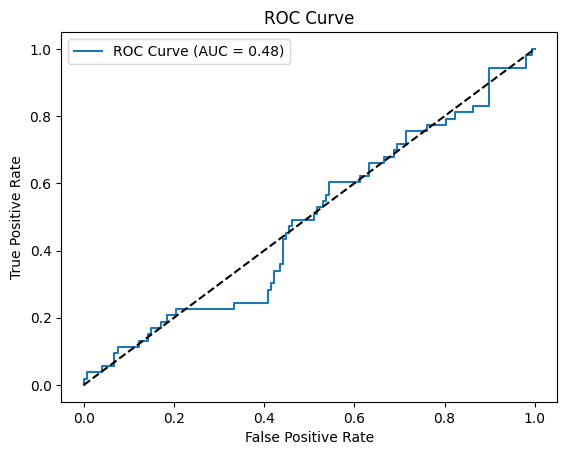

In [ ]:
### ROC curve is the graphical representation of binary classification model like this one
### ROC AUC evaluates the performance of the binary classification models.

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


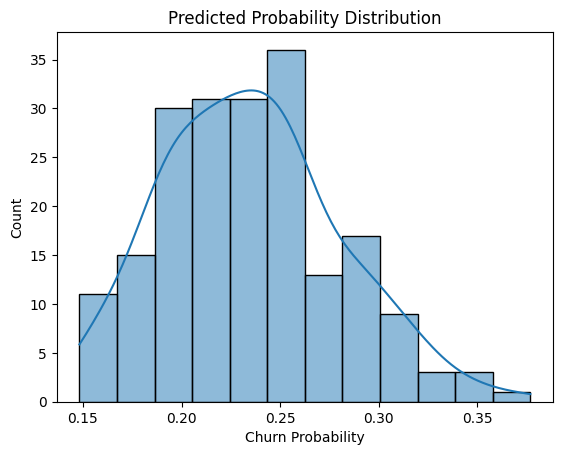

In [ ]:
y_prob = model.predict_proba(X_test_final)[:, 1]
sns.histplot(y_prob, kde=True)
plt.title("Predicted Probability Distribution")
plt.xlabel("Churn Probability")
plt.show()


### Recommendations:
> Focus on Discount option and provide premium content to reduce churn
